## Код для статистических вычислений по курсовой работе "Языковые факторы, влияющие на ошибки в написании глаголов на –тся и –ться" Орловой Ирины Альбертовны

In [1]:
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
df = pd.read_csv('coursepaper.csv')
df

,Предложение,Ошибка,Глагол,Нужная форма,Число,Омофоничность инфинитива и формы третьего лица,Омографичность инфинитива и формы третьего лица,Наличие ГС,ГС,Расстояние между глаголом и ГС,Позиция глагола по отношению к ГС,Синтаксическая роль ГС в предложении
0,Вам за это беспокоится не надо!,есть,беспокоиться,нефинитная,-,да,да,есть,надо,1,препозиция,сказуемое (категория состояния)
1,"Поэтому очень важно не боятся ошибаться, риско...",есть,бояться,нефинитная,-,да,да,есть,важно,1,постпозиция,сказуемое (категория состояния)
2,"Повторюсь, доллар может вернутся выше 70, в од...",есть,вернуться,нефинитная,-,да,да,есть,может,0,постпозиция,сказуемое (финитный глагол)
3,"Еще тысячи остались инвалидами, но это поколен...",есть,вернуться,нефинитная,-,да,да,есть,силы,2,постпозиция,дополнение
4,Вместо звонков по мобилам будем как раньше дог...,есть,встретиться,нефинитная,-,да,да,есть,будем,2,постпозиция,сказуемое (финитный глагол)
...,...,...,...,...,...,...,...,...,...,...,...,...
499,"Получается, что если стараться запомнить как м...",нет,потребоваться,финитная,ед,нет,нет,нет,-,-,-,-
500,"На мой взгляд, это связано с особенностью восп...",нет,требоваться,финитная,ед,нет,нет,нет,-,-,-,-
501,В сети в последнее время стало появляться мног...,нет,являться,финитная,мн,нет,нет,есть,которые,0,постпозиция,-
502,Человеку приходится запоминать огромное количе...,нет,приходиться,финитная,ед,нет,да,нет,-,-,-,-


### Раздел методологии

#### Выбор интервалов расстояния между главным словом и глаголом

In [3]:
distance = df.groupby('Расстояние между глаголом и ГС')['Ошибка'].value_counts().unstack().fillna(0.0).drop(index='-')
distance

Ошибка,есть,нет
Расстояние между глаголом и ГС,,
0,67.0,180.0
1,13.0,59.0
10,1.0,1.0
11,0.0,2.0
12,1.0,3.0
13,0.0,1.0
19,0.0,1.0
2,6.0,23.0
3,3.0,19.0


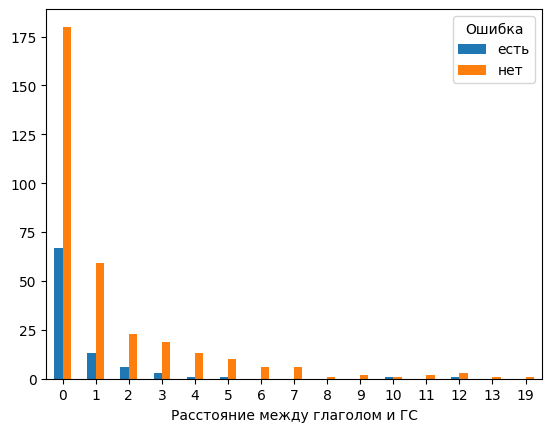

In [4]:
# Диаграмма №1
distance.rename(index={'0':0, '1':1, '10':10, '11':11, '12':12, '13':13, '19':19, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9}, inplace= True )
distance = distance.sort_index()
ax = distance.plot.bar(rot=0)
ax.figure.savefig('distance_plot.png')

### Раздел статистики

#### Разделим наш датасет на два датасета - один с финитными формами глаголов (fin), другой - для инфинитивных (infin)

In [5]:
fin = df[df['Нужная форма'] == 'финитная']
fin

,Предложение,Ошибка,Глагол,Нужная форма,Число,Омофоничность инфинитива и формы третьего лица,Омографичность инфинитива и формы третьего лица,Наличие ГС,ГС,Расстояние между глаголом и ГС,Позиция глагола по отношению к ГС,Синтаксическая роль ГС в предложении
92,Автор раскрывает данное понятие и объясняет на...,есть,бояться,финитная,мн,да,да,есть,люди,0,постпозиция,подлежащее
93,Однако этот подход не учитывает взаимоотношени...,есть,говориться,финитная,ед,да,да,нет,-,-,-,-
94,"Кроме того, Н. Н. Талеб пишет, что открытие че...",есть,говориться,финитная,ед,да,да,есть,обратное,0,препозиция,подлежащее
95,"А для тебя всё закончиться единственное, что б...",есть,закончиться,финитная,ед,да,да,есть,всё,0,постпозиция,подлежащее
96,"Поэтому то, что нравиться одному, может раздра...",есть,нравиться,финитная,ед,да,да,есть,что,0,постпозиция,подлежащее
...,...,...,...,...,...,...,...,...,...,...,...,...
499,"Получается, что если стараться запомнить как м...",нет,потребоваться,финитная,ед,нет,нет,нет,-,-,-,-
500,"На мой взгляд, это связано с особенностью восп...",нет,требоваться,финитная,ед,нет,нет,нет,-,-,-,-
501,В сети в последнее время стало появляться мног...,нет,являться,финитная,мн,нет,нет,есть,которые,0,постпозиция,-
502,Человеку приходится запоминать огромное количе...,нет,приходиться,финитная,ед,нет,да,нет,-,-,-,-


In [6]:
infin = df[df['Нужная форма'] == 'нефинитная']
infin

,Предложение,Ошибка,Глагол,Нужная форма,Число,Омофоничность инфинитива и формы третьего лица,Омографичность инфинитива и формы третьего лица,Наличие ГС,ГС,Расстояние между глаголом и ГС,Позиция глагола по отношению к ГС,Синтаксическая роль ГС в предложении
0,Вам за это беспокоится не надо!,есть,беспокоиться,нефинитная,-,да,да,есть,надо,1,препозиция,сказуемое (категория состояния)
1,"Поэтому очень важно не боятся ошибаться, риско...",есть,бояться,нефинитная,-,да,да,есть,важно,1,постпозиция,сказуемое (категория состояния)
2,"Повторюсь, доллар может вернутся выше 70, в од...",есть,вернуться,нефинитная,-,да,да,есть,может,0,постпозиция,сказуемое (финитный глагол)
3,"Еще тысячи остались инвалидами, но это поколен...",есть,вернуться,нефинитная,-,да,да,есть,силы,2,постпозиция,дополнение
4,Вместо звонков по мобилам будем как раньше дог...,есть,встретиться,нефинитная,-,да,да,есть,будем,2,постпозиция,сказуемое (финитный глагол)
...,...,...,...,...,...,...,...,...,...,...,...,...
341,"Какую бы информацию ему не говорили, он на вря...",нет,прислушиваться,нефинитная,-,нет,нет,есть,станет,2,постпозиция,сказуемое (финитный глагол)
342,"Какую бы информацию ему не говорили, он на вря...",нет,стараться,нефинитная,-,нет,нет,есть,станет,4,постпозиция,сказуемое (финитный глагол)
343,В сети в последнее время стало появляться мног...,нет,появляться,нефинитная,-,нет,нет,есть,стало,0,постпозиция,сказуемое (категория состояния)
344,"Я сам нередко встречал людей, которым проще не...",нет,вдаваться,нефинитная,-,нет,нет,нет,-,-,-,-


#### Проверка гипотезы №1: Ошибки при написании инфинитивных форм встречаются чаще, чем при написании финитных форм.

In [7]:
# Распределение ошибок среди инфинитивов
form_infin = infin['Ошибка'].value_counts()
form_infin

Ошибка
нет     250
есть     53
Name: count, dtype: int64

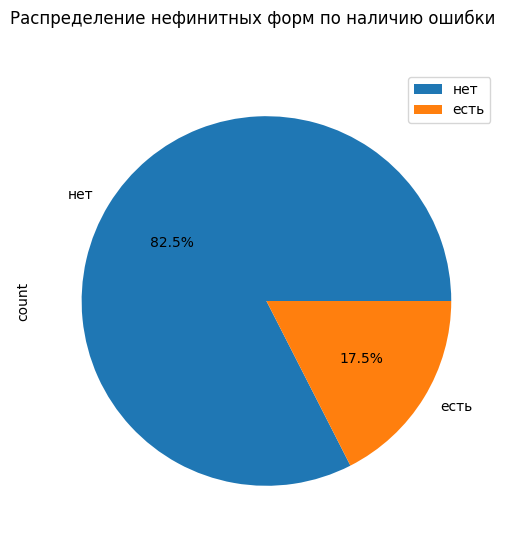

In [8]:
# Диаграмма №2
ax = form_infin.plot.pie(subplots=True, figsize=(11, 6), autopct='%1.1f%%', legend = True, title = "Распределение нефинитных форм по наличию ошибки")
fig = ax[0].get_figure()
fig.savefig("infin_plot.png")

In [9]:
# Распределение ошибок среди финитных форм
form_fin = fin['Ошибка'].value_counts()
form_fin

Ошибка
нет     150
есть     51
Name: count, dtype: int64

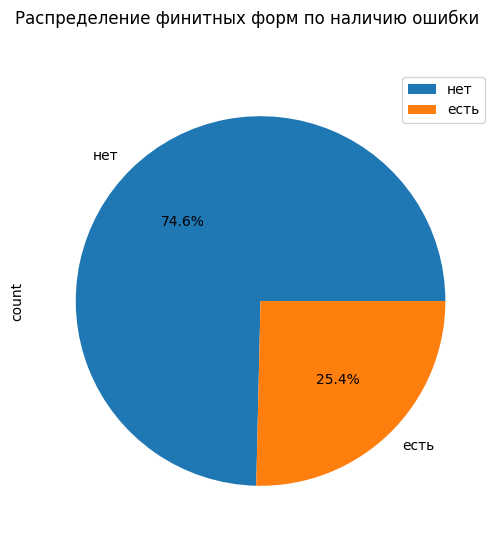

In [10]:
# Диаграмма №3
ax = form_fin.plot.pie(subplots=True, figsize=(11, 6), autopct='%1.1f%%', legend = True, title = "Распределение финитных форм по наличию ошибки")
fig = ax[0].get_figure()
fig.savefig("fin_plot.png")

In [11]:
form = df.groupby('Нужная форма')['Ошибка'].value_counts().unstack().T
form

Нужная форма,нефинитная,финитная
Ошибка,,
есть,53,51
нет,250,150


In [12]:
scipy.stats.chi2_contingency(form, correction = False)

Chi2ContingencyResult(statistic=4.583328596923986, pvalue=0.03228444314079132, dof=1, expected_freq=array([[ 62.52380952,  41.47619048],
       [240.47619048, 159.52380952]]))

#### Проверка гипотезы №2: Вероятность ошибки выше при написании форм глагола, инфинитив и форма третьего лица которого омофоничны.

In [13]:
omophony = df.groupby('Омофоничность инфинитива и формы третьего лица')['Ошибка'].value_counts().unstack().T
omophony

Омофоничность инфинитива и формы третьего лица,да,нет
Ошибка,,
есть,43,61
нет,86,314


In [14]:
scipy.stats.chi2_contingency(omophony, correction = False)

Chi2ContingencyResult(statistic=17.07086769230769, pvalue=3.601048273114491e-05, dof=1, expected_freq=array([[ 26.61904762,  77.38095238],
       [102.38095238, 297.61904762]]))

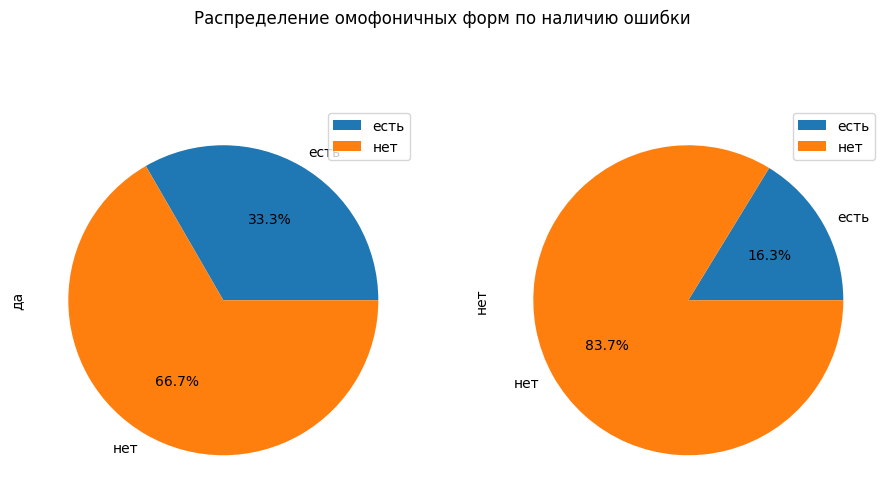

In [15]:
ax = omophony.plot.pie(subplots=True, figsize=(11, 6), autopct='%1.1f%%', legend = True, title = "Распределение омофоничных форм по наличию ошибки")
fig = ax[0].get_figure()
fig.savefig("omophony_plot.png")

#### Проверка гипотезы №3: Вероятность ошибки выше при написании форм глагола, инфинитив и форма третьего лица которого омографичны.

In [16]:
omography = df.groupby('Омографичность инфинитива и формы третьего лица')['Ошибка'].value_counts().unstack().T
omography

Омографичность инфинитива и формы третьего лица,да,нет
Ошибка,,
есть,84,20
нет,136,264


In [17]:
scipy.stats.chi2_contingency(omography, correction = False)

Chi2ContingencyResult(statistic=73.40122367773071, pvalue=1.0580048015090923e-17, dof=1, expected_freq=array([[ 45.3968254,  58.6031746],
       [174.6031746, 225.3968254]]))

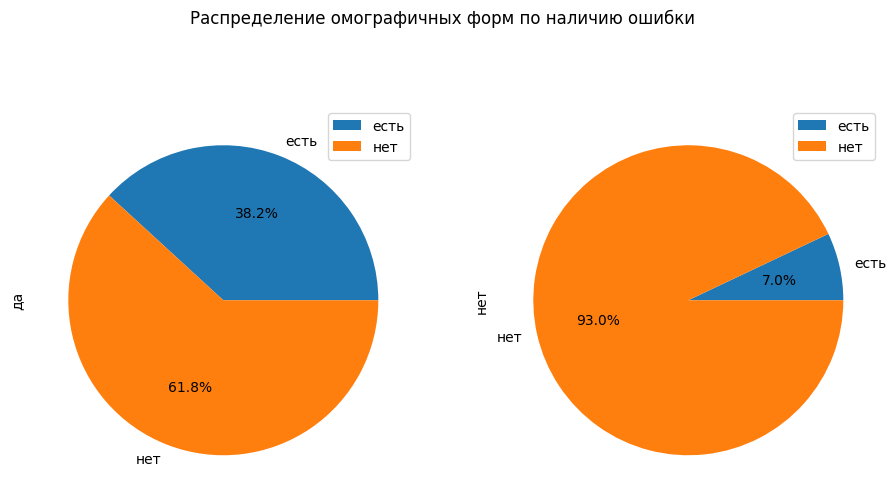

In [18]:
ax = omography.plot.pie(subplots=True, figsize=(11, 6), autopct='%1.1f%%', legend = True, title = "Распределение омографичных форм по наличию ошибки")
fig = ax[0].get_figure()
fig.savefig("omography_plot.png")

#### Проверка гипотезы №4: В финитных глаголах единственного числа ошибок будет меньше, чем в формах множественного числа.

In [19]:
number = fin.groupby('Число')['Ошибка'].value_counts().unstack().T
number

Число,ед,мн
Ошибка,,
есть,40,11
нет,112,38


In [20]:
scipy.stats.chi2_contingency(number, correction = False)

Chi2ContingencyResult(statistic=0.29260377835344625, pvalue=0.5885567791904986, dof=1, expected_freq=array([[ 38.56716418,  12.43283582],
       [113.43283582,  36.56716418]]))

#### Проверка гипотезы №5: Отсутствие главного слова при глаголе повышает вероятность его неправильного написания

In [21]:
# Распределение ошибок среди финитных форм
head_existence_fin = fin.groupby('Наличие ГС')['Ошибка'].value_counts().unstack().T
head_existence_fin

Наличие ГС,есть,нет
Ошибка,,
есть,42,9
нет,118,32


In [22]:
scipy.stats.chi2_contingency(head_existence_fin, correction = False)

Chi2ContingencyResult(statistic=0.31851434720229543, pvalue=0.5725018386636072, dof=1, expected_freq=array([[ 40.59701493,  10.40298507],
       [119.40298507,  30.59701493]]))

In [23]:
# Распределение ошибок среди инфинитивов
head_existence_infin = infin.groupby('Наличие ГС')['Ошибка'].value_counts().unstack().T
head_existence_infin

Наличие ГС,есть,нет
Ошибка,,
есть,51,2
нет,209,41


In [24]:
scipy.stats.chi2_contingency(head_existence_infin, correction = False)

Chi2ContingencyResult(statistic=5.725017632564891, pvalue=0.016724868658724194, dof=1, expected_freq=array([[ 45.47854785,   7.52145215],
       [214.52145215,  35.47854785]]))

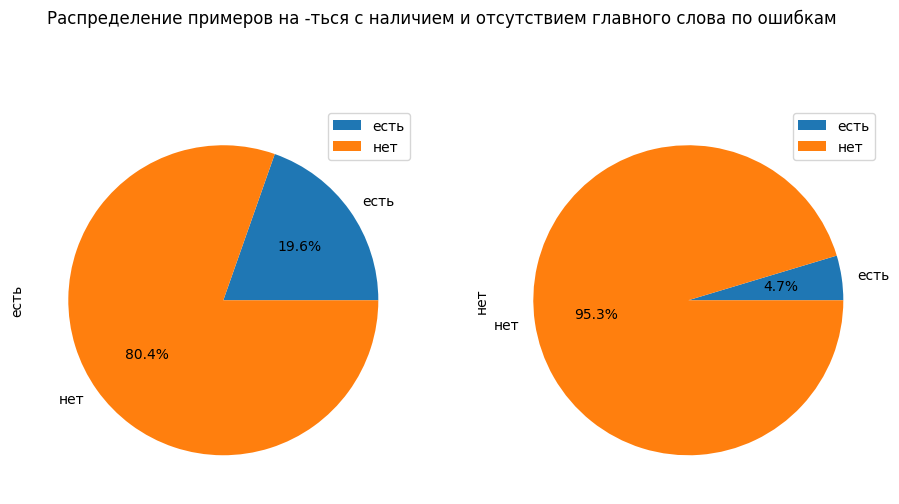

In [25]:
ax = head_existence_infin.plot.pie(subplots=True, figsize=(11, 6), autopct='%1.1f%%', legend = True, title = "Распределение примеров на -ться с наличием и отсутствием главного слова по ошибкам")
fig = ax[0].get_figure()
fig.savefig("infin_head_existence_plot.png")

#### Проверка гипотезы №6: Препозиция глагола по отношению к главному слову увеличивает вероятность ошибки при его написании.

In [26]:
# Распределение ошибок среди инфинитивов
position_infin = infin.groupby('Позиция глагола по отношению к ГС')['Ошибка'].value_counts().unstack().drop(index='-').T
position_infin

Позиция глагола по отношению к ГС,постпозиция,препозиция
Ошибка,,
есть,49,2
нет,205,4


In [27]:
scipy.stats.chi2_contingency(position_infin, correction = False)

Chi2ContingencyResult(statistic=0.7329923894610273, pvalue=0.39191495490240946, dof=1, expected_freq=array([[ 49.82307692,   1.17692308],
       [204.17692308,   4.82307692]]))

In [28]:
# Распределение ошибок среди финитных форм
position_fin = fin.groupby('Позиция глагола по отношению к ГС')['Ошибка'].value_counts().unstack().drop(index='-').T
position_fin

Позиция глагола по отношению к ГС,постпозиция,препозиция
Ошибка,,
есть,33,9
нет,89,29


In [29]:
scipy.stats.chi2_contingency(position_fin, correction = False)

Chi2ContingencyResult(statistic=0.1694706340733746, pvalue=0.6805827010041892, dof=1, expected_freq=array([[32.025,  9.975],
       [89.975, 28.025]]))

#### Проверка гипотезы №7: Ненулевое расстояние между главным словом и глагольной формой провоцирует больше ошибок. 

In [30]:
# Распределение расстояний у инфинитивов
distance_infin = infin.groupby('Расстояние между глаголом и ГС')['Ошибка'].value_counts().unstack().fillna(0.0).drop(index='-').T
distance_infin

Расстояние между глаголом и ГС,0,1,10,11,12,13,2,3,4,5,6,7,8,9
Ошибка,,,,,,,,,,,,,,
есть,38.0,7.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
нет,131.0,28.0,1.0,1.0,1.0,1.0,10.0,10.0,10.0,6.0,5.0,2.0,1.0,2.0


In [31]:
# Перегруппировка расстояний

distance_infin_yes_error_1_5 = 7 + 3 + 1 + 1 + 1
distance_infin_yes_error_more_5 = 0
distance_infin_no_error_1_5 = 28 + 10 + 10 + 10 + 6
distance_infin_no_error_more_5 = 5 + 2 + 1 + 2 + 1 + 1 + 1 + 1

distance_infin = {'Расстояние 0': [38, 131],
        'Расстояние от 1 до 5': [distance_infin_yes_error_1_5, distance_infin_no_error_1_5],
        'Расстояние больше 5': [distance_infin_yes_error_more_5, distance_infin_no_error_more_5]
        }

distance_infin = pd.DataFrame(distance_infin, index=['Ошибка есть', 'Ошибки нет'])

distance_infin

,Расстояние 0,Расстояние от 1 до 5,Расстояние больше 5
Ошибка есть,38,13,0
Ошибки нет,131,64,14


In [32]:
scipy.stats.chi2_contingency(distance_infin, correction = False)

Chi2ContingencyResult(statistic=4.663554852127889, pvalue=0.09712296469220157, dof=2, expected_freq=array([[ 33.15      ,  15.10384615,   2.74615385],
       [135.85      ,  61.89615385,  11.25384615]]))

In [33]:
# Распределение расстояний у финитных форм
distance_fin = fin.groupby('Расстояние между глаголом и ГС')['Ошибка'].value_counts().unstack().fillna(0.0).drop(index='-').T
distance_fin

Расстояние между глаголом и ГС,0,1,10,11,12,19,2,3,4,5,6,7
Ошибка,,,,,,,,,,,,
есть,29.0,6.0,1.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0
нет,49.0,31.0,0.0,1.0,2.0,1.0,13.0,9.0,3.0,4.0,1.0,4.0


In [34]:
# Перегруппировка расстояний
distance_fin_yes_error_1_5 = 6 + 3 + 2 + 0 + 0
distance_fin_yes_error_more_5 = 1 + 1
distance_fin_no_error_1_5 = 31 + 13 + 9 + 3 + 4
distance_fin_no_error_more_5 = 1 + 4 + 1 + 2 + 1

distance_fin = {'Расстояние 0': [29, 49],
        'Расстояние от 1 до 5': [distance_fin_yes_error_1_5, distance_fin_no_error_1_5],
        'Расстояние больше 5': [distance_fin_yes_error_more_5, distance_fin_no_error_more_5]
        }

distance_fin = pd.DataFrame(distance_fin, index=['Ошибка есть', 'Ошибки нет'])

distance_fin

,Расстояние 0,Расстояние от 1 до 5,Расстояние больше 5
Ошибка есть,29,11,2
Ошибки нет,49,60,9


In [35]:
scipy.stats.chi2_contingency(distance_fin, correction = False)

Chi2ContingencyResult(statistic=9.426507817531927, pvalue=0.00897552447700441, dof=2, expected_freq=array([[20.475 , 18.6375,  2.8875],
       [57.525 , 52.3625,  8.1125]]))

#### Проверка гипотезы №8: Синтаксическая роль главного слова при глаголе влияет на вероятность ошибки в нём.

In [36]:
# Для финитных форм
synt_role_fin = fin.groupby('Синтаксическая роль ГС в предложении')['Ошибка'].value_counts().unstack().fillna(0.0).drop(index='-').T
synt_role_fin

Синтаксическая роль ГС в предложении,подлежащее,сказуемое (инфинитив),сказуемое (финитный глагол)
Ошибка,,,
есть,36.0,0.0,0.0
нет,104.0,1.0,2.0


In [37]:
# Перегруппировка синтаксических ролей
synt_role_fin_yes_error_other = 0
synt_role_fin_no_error_other = 3

synt_role_fin = {'Подлежащее': [36, 104],
        'Другой синтаксический актант': [synt_role_fin_yes_error_other, synt_role_fin_no_error_other],
        }

synt_role_fin = pd.DataFrame(synt_role_fin, index=['Ошибка есть', 'Ошибки нет'])

synt_role_fin

,Подлежащее,Другой синтаксический актант
Ошибка есть,36,0
Ошибки нет,104,3


In [38]:
scipy.stats.chi2_contingency(synt_role_fin, correction = False)

Chi2ContingencyResult(statistic=1.0309746328437919, pvalue=0.3099298643461197, dof=1, expected_freq=array([[ 35.24475524,   0.75524476],
       [104.75524476,   2.24475524]]))

In [39]:
# Для инфинитивов
synt_role_infin = infin.groupby('Синтаксическая роль ГС в предложении')['Ошибка'].value_counts().unstack().fillna(0.0).drop(index='-').T
synt_role_infin

Синтаксическая роль ГС в предложении,дополнение,определение,подлежащее,сказуемое (именная часть),сказуемое (инфинитив),сказуемое (категория состояния),сказуемое (финитный глагол)
Ошибка,,,,,,,
есть,2.0,0.0,1.0,1.0,1.0,8.0,38.0
нет,17.0,2.0,7.0,5.0,9.0,47.0,122.0


In [40]:
# Перегруппировка синтаксических ролей
synt_role_infin_yes_error_predic = 1 + 1 + 8 + 38
synt_role_infin_no_error_predic = 5 + 9 + 47 + 122
synt_role_infin_yes_error_other = 2 + 1
synt_role_infin_no_error_other = 17 + 2 + 7

synt_role_infin = {'Сказуемое': [synt_role_infin_yes_error_predic, synt_role_infin_no_error_predic],
        'Другой синтаксический актант': [synt_role_infin_yes_error_other, synt_role_infin_no_error_other]
        }

synt_role_infin = pd.DataFrame(synt_role_infin, index=['Ошибка есть', 'Ошибки нет'])

synt_role_infin

,Сказуемое,Другой синтаксический актант
Ошибка есть,48,3
Ошибки нет,183,26


In [41]:
scipy.stats.chi2_contingency(synt_role_infin, correction = False)

Chi2ContingencyResult(statistic=1.7791036859915028, pvalue=0.18225942715932153, dof=1, expected_freq=array([[ 45.31153846,   5.68846154],
       [185.68846154,  23.31153846]]))

In [42]:
set1 = df[(df["Нужная форма"] == "финитная") & (df["Омофоничность инфинитива и формы третьего лица"] == "нет")]
set1_res = set1["Ошибка"].value_counts()

In [43]:
set2 = df[(df["Нужная форма"] == "нефинитная") & (df["Омофоничность инфинитива и формы третьего лица"] == "да")]
set2_res = set2["Ошибка"].value_counts()

In [44]:
set1_res + set2_res

Ошибка
нет     196
есть     60
Name: count, dtype: int64

### Раздел обсуждения результатов и методологии

In [45]:
# Финитные формы без омофонии
set1 = df[(df["Нужная форма"] == "финитная") & (df["Омофоничность инфинитива и формы третьего лица"] == "нет")]
s1 = pd.DataFrame(set1["Ошибка"].value_counts())
s1

,count
Ошибка,
нет,130
есть,34


In [46]:
# Инфинитивы с омофонией
set2 = df[(df["Нужная форма"] == "нефинитная") & (df["Омофоничность инфинитива и формы третьего лица"] == "да")]
s2 = pd.DataFrame(set2["Ошибка"].value_counts())
s2

,count
Ошибка,
нет,66
есть,26


In [47]:
res1 = pd.DataFrame({"Финитная неомофоничная форма": s1["count"].to_list(), "Нефинитная омофоничная форма": s2["count"].to_list()}, index = ["ошибки нет", "ошибка есть"])
res1

,Финитная неомофоничная форма,Нефинитная омофоничная форма
ошибки нет,130,66
ошибка есть,34,26


In [48]:
scipy.stats.chi2_contingency(res1, correction = False)

Chi2ContingencyResult(statistic=1.8619054832961819, pvalue=0.17240504117981015, dof=1, expected_freq=array([[125.5625,  70.4375],
       [ 38.4375,  21.5625]]))

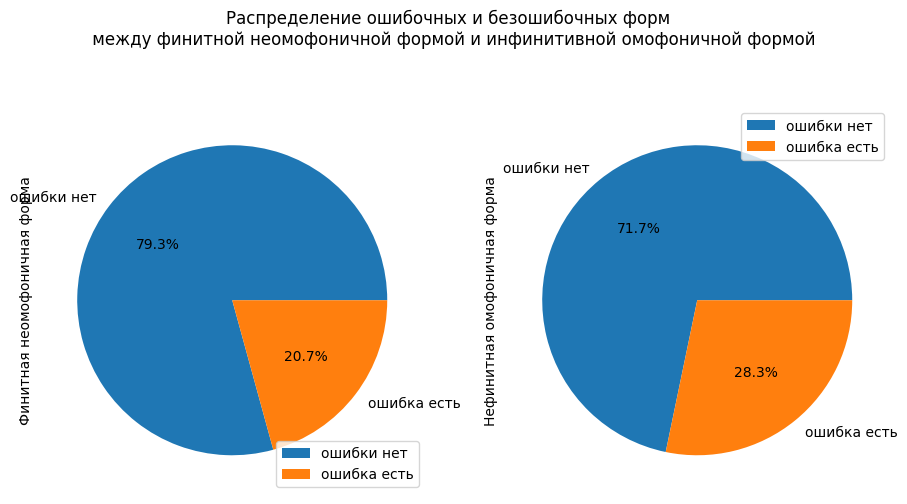

In [49]:
ax = res1.plot.pie(subplots=True, figsize=(11, 6), autopct='%1.1f%%', legend = True, title = "Распределение ошибочных и безошибочных форм \n между финитной неомофоничной формой и инфинитивной омофоничной формой")
fig = ax[0].get_figure()
fig.savefig("res1.png")

In [50]:
# Финитные формы без омографии
set3 = df[(df["Нужная форма"] == "финитная") & (df["Омографичность инфинитива и формы третьего лица"] == "нет")]
s3 = pd.DataFrame(set3["Ошибка"].value_counts())
s3

,count
Ошибка,
нет,115
есть,10


In [51]:
# Инфинитивы с омографией
set4 = df[(df["Нужная форма"] == "нефинитная") & (df["Омографичность инфинитива и формы третьего лица"] == "да")]
s4 = pd.DataFrame(set4["Ошибка"].value_counts())
s4

,count
Ошибка,
нет,101
есть,43


In [52]:
res2 = pd.DataFrame({"Финитная неомографичная форма": s3["count"].to_list(), "Нефинитная омографичная форма": s4["count"].to_list()}, index = ["ошибки нет", "ошибка есть"])
res2

,Финитная неомографичная форма,Нефинитная омографичная форма
ошибки нет,115,101
ошибка есть,10,43


In [53]:
scipy.stats.chi2_contingency(res2, correction = False)

Chi2ContingencyResult(statistic=20.213411973949842, pvalue=6.9265603045170855e-06, dof=1, expected_freq=array([[100.37174721, 115.62825279],
       [ 24.62825279,  28.37174721]]))

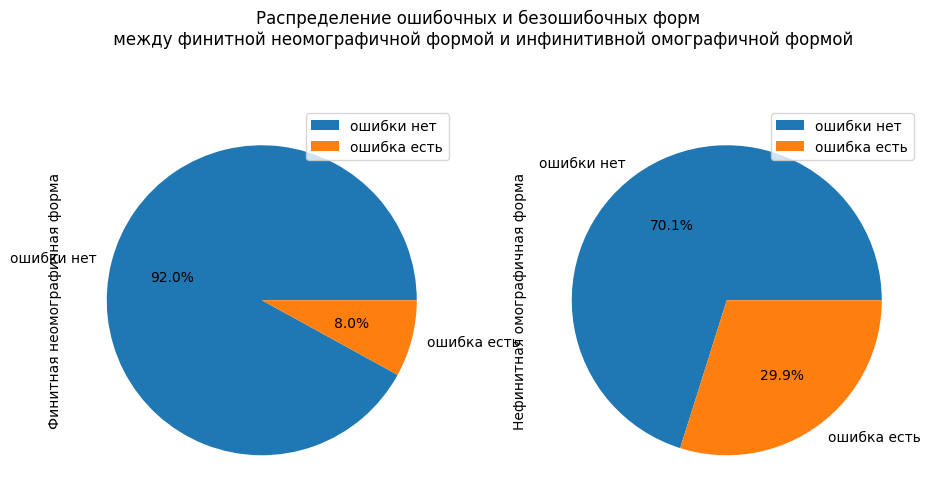

In [54]:
ax = res2.plot.pie(subplots=True, figsize=(11, 6), autopct='%1.1f%%', legend = True, title = "Распределение ошибочных и безошибочных форм \n между финитной неомографичной формой и инфинитивной омографичной формой")
fig = ax[0].get_figure()
fig.savefig("res2.png")